In [123]:
from urllib2 import Request, urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Get the data from the Toronto Open Data Website
request=Request('http://app.toronto.ca/opendata/heat_alerts/heat_alerts_list.json')
response = urlopen(request)
heatData = response.read()

#EHAE = Continued Extended Heat Warning
#HAU = Upgraded Heat Warning to an Extended Heat Warning
#HAE = Continued Heat Warning
#HA = Heat Warning
#EHA = Extended Heat Warning
#EHAD = Downgraded Extreme Heat Warning to a Heat Warning

In [124]:
data = pd.read_json(heatData)

#Preview
data.head()

,code,date,id,text
0,EHAE,2017-09-26,242,Toronto's Medical Officer of Health has contin...
1,HAU,2017-09-25,241,Toronto's Medical Officer of Health has upgrad...
2,HAE,2017-09-24,240,Toronto's Medical Officer of Health has contin...
3,HA,2017-09-23,239,Toronto's Medical Officer of Health has issued...
4,HA,2017-06-17,237,Toronto's Medical Officer of Health has issued...


In [125]:
#Quick Analysis
data['code'].describe()

count     207
unique      6
top        HA
freq       96
Name: code, dtype: object

In [126]:
data['date'].describe()

count                     207
unique                    207
top       2015-07-19 00:00:00
freq                        1
first     2001-06-15 00:00:00
last      2017-09-26 00:00:00
Name: date, dtype: object

In [127]:
#Counts of Number of Codes
countsCodes = data.groupby('code').size()
countsCodes.head()

code
EHA     59
EHAD     1
EHAE    19
HA      96
HAE     18
dtype: int64

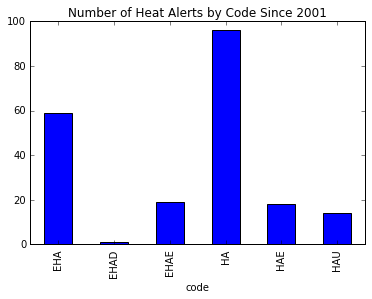

In [128]:
#Number of heat alerts by code since 2001

codePlot = countsCodes.plot(kind='bar',title="Number of Heat Alerts by Code Since 2001")
plt.show()

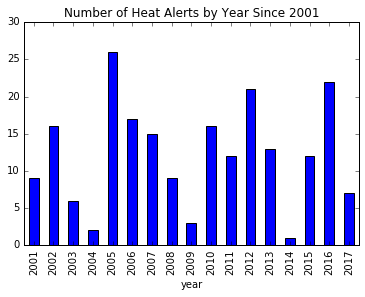

In [129]:
#Number of heat alerts in total by year since 2001

data['year'] = data['date'].dt.year
#data.head()
countsCodes = data.groupby('year').size()
#countsCodes.head()
codePlot = countsCodes.plot(kind='bar',title='Number of Heat Alerts by Year Since 2001')
plt.show()

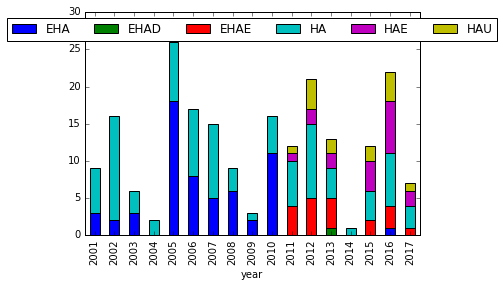

In [131]:
#Number of heat alerts by year and code since 2001

codeGroupYear = data.groupby(['year','code']).size()
#codeGroupYear.unstack().head()
codeGroupYearPlot = codeGroupYear.unstack().plot(kind='bar',stacked=True)
codeGroupYearPlot.legend(["EHA","EHAD","EHAE","HA","HAE","HAU"],loc=9,ncol=6)